## McDonald's Analysis by Umamahesh Yenamala

In [1]:
import pandas as pd

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df =  pd.read_csv("mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [7]:
df.shape

(1453, 15)

In [8]:
df.isnull()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [11]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [12]:
df['yummy'].value_counts()

yummy
Yes    803
No     650
Name: count, dtype: int64

In [13]:
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [14]:
MD_x = df.iloc[:, 0:11].copy()
MD_x = (MD_x == "Yes").astype(int)
result = round(MD_x.mean(), 2)

In [15]:
result

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [21]:
scaler = StandardScaler()
MD_x_standardized = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x_standardized)

# Print summary
print("Explained Variance Ratio:")
print(MD_pca.explained_variance_ratio_)
print("\nSummary of PCA:")
print(pd.DataFrame({'Standard deviation': np.sqrt(MD_pca.explained_variance_),'Proportion of Variance': MD_pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)}))

Explained Variance Ratio:
[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]

Summary of PCA:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             1.677250                0.255566               0.255566
1             1.277868                0.148348               0.403914
2             1.175207                0.125469               0.529383
3             1.040053                0.098270               0.627653
4             0.958620                0.083484               0.711136
5             0.884613                0.071091               0.782227
6             0.845774                0.064986               0.847213
7             0.769870                0.053845               0.901058
8             0.724065                0.047628               0.948686
9             0.554809                0.027964               0.976650
10            0.506983                0.023350               1.

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [24]:
# Assuming MD_pca is your PCA object from the previous example
# Replace it with the actual name of your PCA object if different

# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(np.sqrt(MD_pca.explained_variance_), 1))

# Print rotation matrix
print("\nRotation (n x k) = (11 x 11):")
rotation_matrix = pd.DataFrame(MD_pca.components_.T, columns=[f'PC{i+1}' for i in range(MD_pca.components_.shape[0])])
print(rotation_matrix)


Standard deviations (1, .., p=11):
[1.7 1.3 1.2 1.  1.  0.9 0.8 0.8 0.7 0.6 0.5]

Rotation (n x k) = (11 x 11):
    PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
0  -0.4  0.3 -0.3  0.0  0.3 -0.1  0.2  0.0 -0.2   0.7  -0.1
1  -0.3 -0.0 -0.3 -0.0 -0.4  0.2 -0.7  0.2 -0.3   0.0   0.0
2  -0.0  0.1  0.0  0.8 -0.2  0.4  0.2 -0.0  0.0   0.1  -0.0
3   0.2 -0.2 -0.6 -0.0  0.1  0.1 -0.0 -0.7  0.1  -0.0  -0.1
4   0.3 -0.1 -0.4  0.3  0.3 -0.3 -0.3  0.5  0.3  -0.0  -0.0
5  -0.2 -0.3 -0.2  0.1 -0.6 -0.6  0.4  0.1  0.1   0.0  -0.1
6  -0.3 -0.6  0.1  0.1  0.3  0.0 -0.0 -0.1 -0.1   0.1   0.7
7  -0.4  0.2 -0.3  0.1  0.3 -0.1  0.2  0.1 -0.2  -0.7   0.0
8   0.3  0.6 -0.2  0.0 -0.2 -0.2  0.0 -0.1 -0.0   0.0   0.7
9  -0.3  0.2  0.4  0.3  0.1 -0.4 -0.4 -0.4  0.2  -0.1  -0.1
10  0.4 -0.1  0.1  0.2  0.1 -0.3 -0.0 -0.1 -0.8  -0.0  -0.1


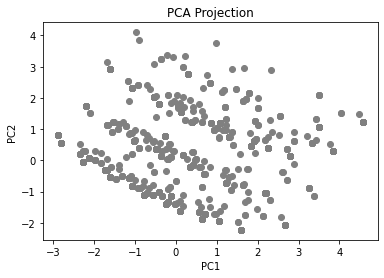

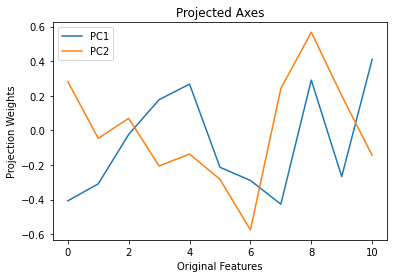

In [25]:
import matplotlib.pyplot as plt

# Assuming MD_pca is your PCA object from the previous example
# Replace it with the actual name of your PCA object if different

# Transform the data using the first two principal components
MD_pca_transformed = MD_pca.transform(MD_x_standardized)

# Plot the transformed data
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

# Plot projected axes
plt.figure()
plt.plot(MD_pca.components_[0, :], label='PC1')
plt.plot(MD_pca.components_[1, :], label='PC2')
plt.xlabel('Original Features')
plt.ylabel('Projection Weights')
plt.title('Projected Axes')
plt.legend()
plt.show()


In [26]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming MD_x is your binary matrix from the previous example
# Replace it with the actual name of your binary matrix if different

# Set seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering for k=2 to k=8 with 10 repetitions
results = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    results.append(kmeans)

# Choose the best result based on inertia or other criteria
# You may want to customize the selection based on your specific criteria
best_kmeans = results[3]  # For example, choosing k=5

# Relabel the clusters
labels = best_kmeans.labels_

# Print the cluster assignments
print(labels)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\an

[2 3 4 ... 4 0 1]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


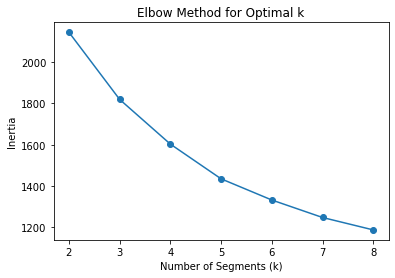

In [27]:
import matplotlib.pyplot as plt

# Assuming best_kmeans is your selected k-means result from the previous example
# Replace it with the actual name of your k-means result if different

# Plot the clustering results for each k
inertia_values = [kmeans.inertia_ for kmeans in results]

plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [29]:
pip install yellowbrick


  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dell\an

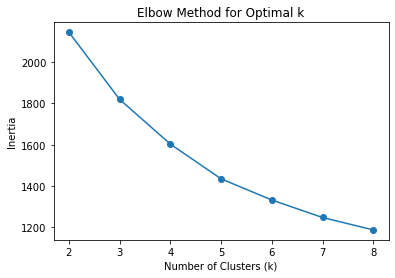

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_x is your binary matrix from the previous example
# Replace it with the actual name of your binary matrix if different

# Set seed for reproducibility
np.random.seed(1234)

# Perform bootstrapping for k=2 to k=8 with 10 repetitions and 100 bootstraps
inertia_values = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



In [47]:
MD_x = df.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


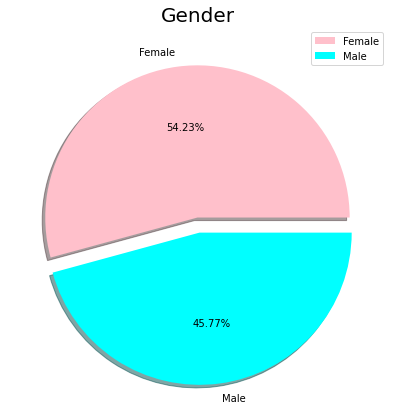

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


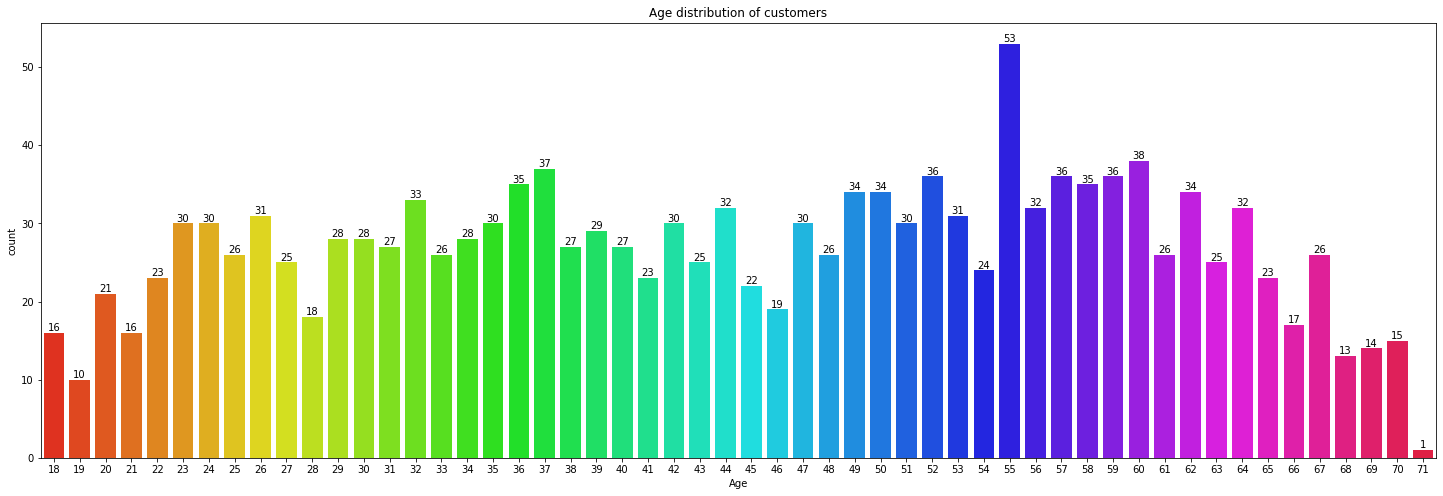

In [48]:
#EXPLORING DATA

#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

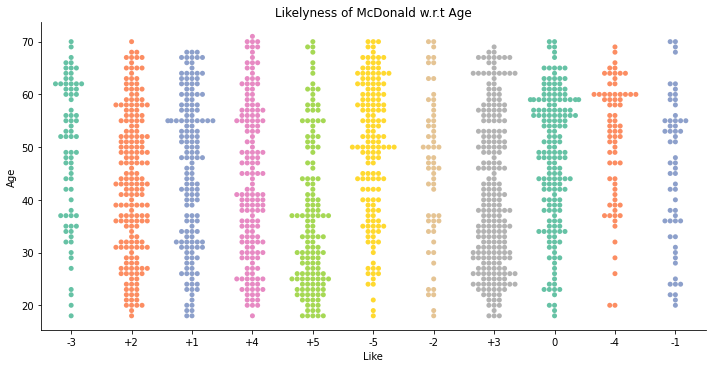

In [49]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=df,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [50]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


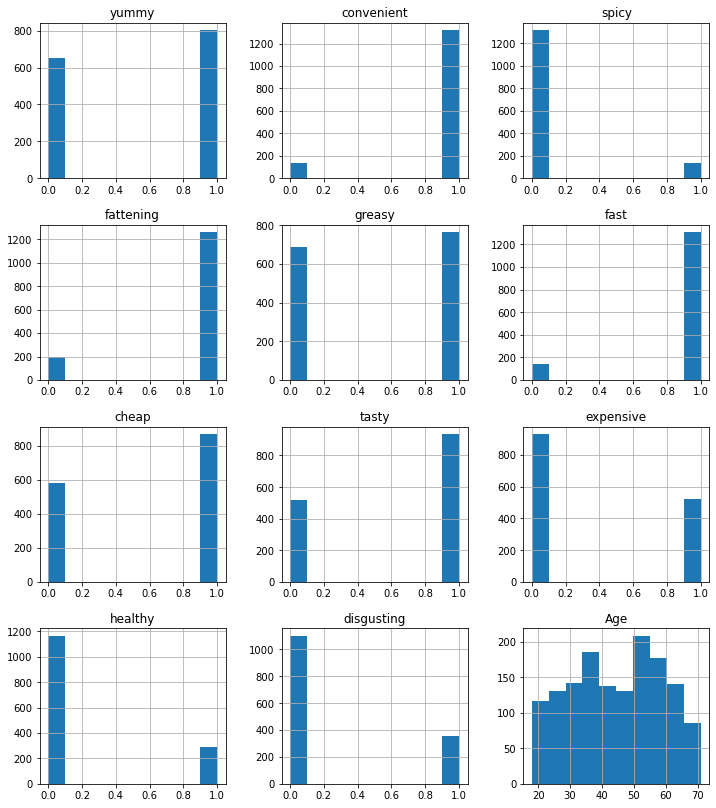

In [51]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [52]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [53]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

## PCA

In [54]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [55]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25556637, 0.40391399, 0.52938308, 0.62765279, 0.71113635,
       0.78222737, 0.84721295, 0.90105773, 0.94868581, 0.9766496 ,
       1.        ])

In [56]:
pca = PCA()
pca.fit(df_eleven)

# Get loadings and number of principal components
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.5,0.4,-0.3,0.1,-0.3,0.2,-0.3,0.0,0.6,-0.1,0.0
convenient,-0.2,0.0,-0.1,-0.1,0.3,-0.3,-0.1,-0.1,-0.0,-0.7,-0.5
spicy,-0.0,0.0,-0.0,0.2,0.1,-0.4,0.7,0.4,0.4,-0.1,0.1
fattening,0.1,-0.0,-0.3,-0.4,-0.1,-0.4,-0.4,0.6,-0.2,-0.0,0.3
greasy,0.3,-0.1,-0.8,0.3,0.4,0.2,0.0,-0.1,-0.0,0.0,0.0
fast,-0.1,-0.1,-0.1,-0.1,0.1,-0.6,-0.1,-0.6,0.2,0.2,0.3
cheap,-0.3,-0.6,-0.1,0.1,-0.1,-0.1,-0.0,0.1,0.1,0.4,-0.5
tasty,-0.5,0.3,-0.3,-0.0,-0.2,-0.1,0.4,-0.1,-0.6,0.1,0.0
expensive,0.3,0.6,0.0,0.1,-0.0,-0.3,-0.1,0.0,0.1,0.5,-0.5


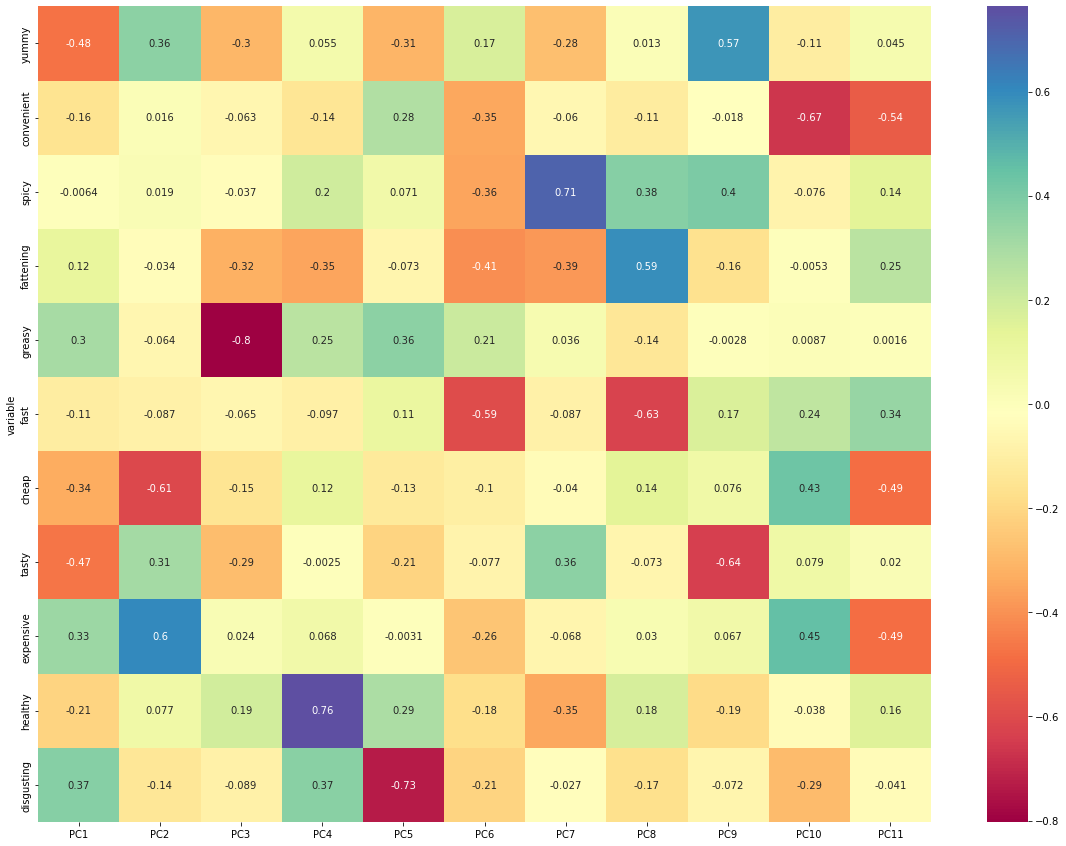

In [57]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [59]:
!pip install bioinfokit


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59091 sha256=3d6c255979068f795e2b1bd6e941ea0f4702143616832ce3038840fb207cc0ba
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\10\04\be\a31133d287facde61ce7ce52667b5e1f6bfa2ebe5d4f5e86f8
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33038 sha256=d78e4a31be89bd95f4e6a215a8cbada96bb27c9f3c6a4649faa0fe631c916a43
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\25\d

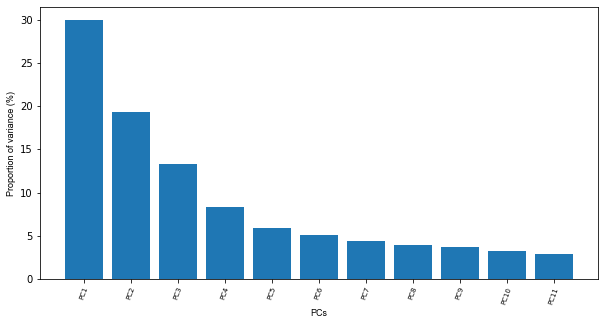

In [60]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

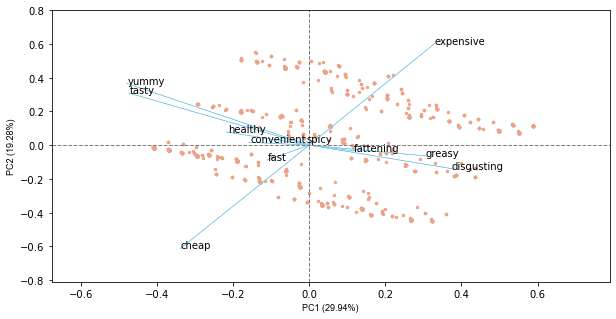

In [61]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [63]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached scikit_learn-1.4.0-cp39-cp39-win_amd64.whl (10.6 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [73]:
pip install --upgrade yellowbrick


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [74]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [77]:
pip install yellowbrick==1.3


     -------------------------------------- 271.3/271.3 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 13.3/13.3 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.5
    Uninstalling yellowbrick-1.5:
      Successfully uninstalled yellowbrick-1.5
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 1.19.5 which is incompatible.
pypmf 0.1.12 requires xlrd<2, but you have xlrd 2.0.1 which is incompatible.
seaborn 0.13.1 requires numpy!=1.24.0,>=1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.1 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


In [67]:
pip install --upgrade pip


  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip list


Package                            Version
---------------------------------- --------------------
absl-py                            1.2.0
adjustText                         1.0.4
alabaster                          0.7.12
altair                             5.0.1
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              3.6.2
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           

In [69]:
pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [79]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 0 0 ... 0 1 3]
1603.0604440558948
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [80]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

In [84]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


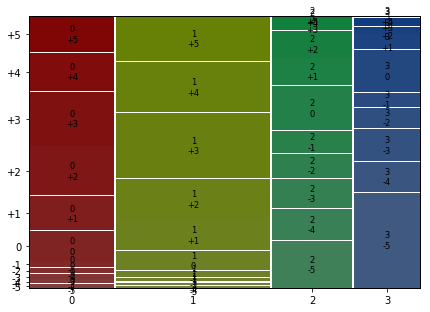

In [85]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [86]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


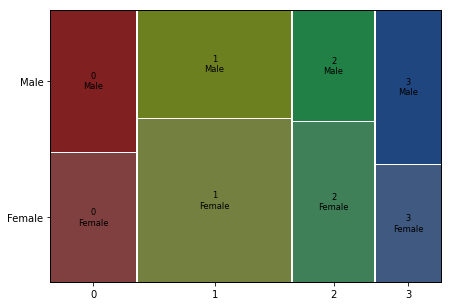

In [87]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

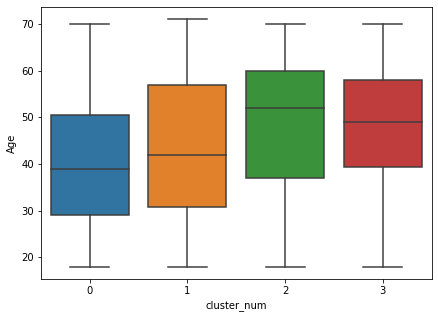

In [88]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

## Selecting target segment

In [89]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.5
1,1,2.6
2,2,2.8
3,3,2.7


In [90]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.3
1,1,3.0
2,2,6.2
3,3,7.4


In [91]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.5
1,1,0.4
2,2,0.4
3,3,0.6


In [92]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.5,3.3,2.5
1,1,0.4,3.0,2.6
2,2,0.4,6.2,2.8
3,3,0.6,7.4,2.7


## Step 8: Selecting (the) Target Segment(s)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


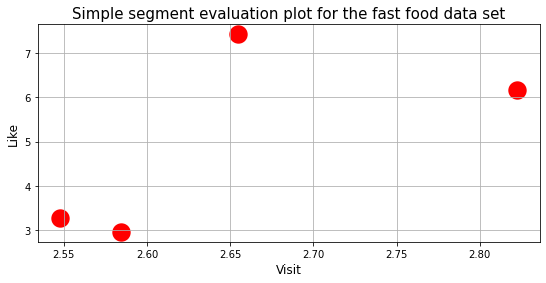

In [94]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.grid()
plt.show()

In [95]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

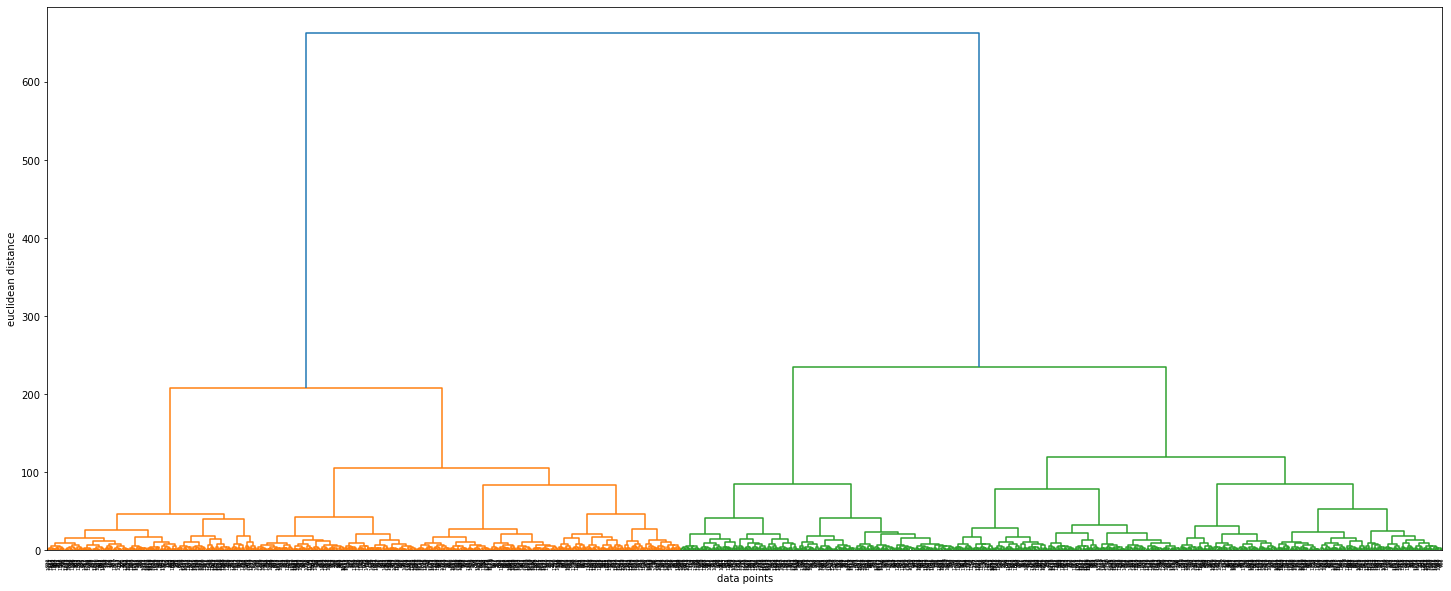

In [96]:
#create demogram and find the best clustering value
df_model = df.drop(['Gender'],axis=1)
merg = shc.linkage(df_model,method="ward")
plt.figure(figsize=(25,10))
shc.dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

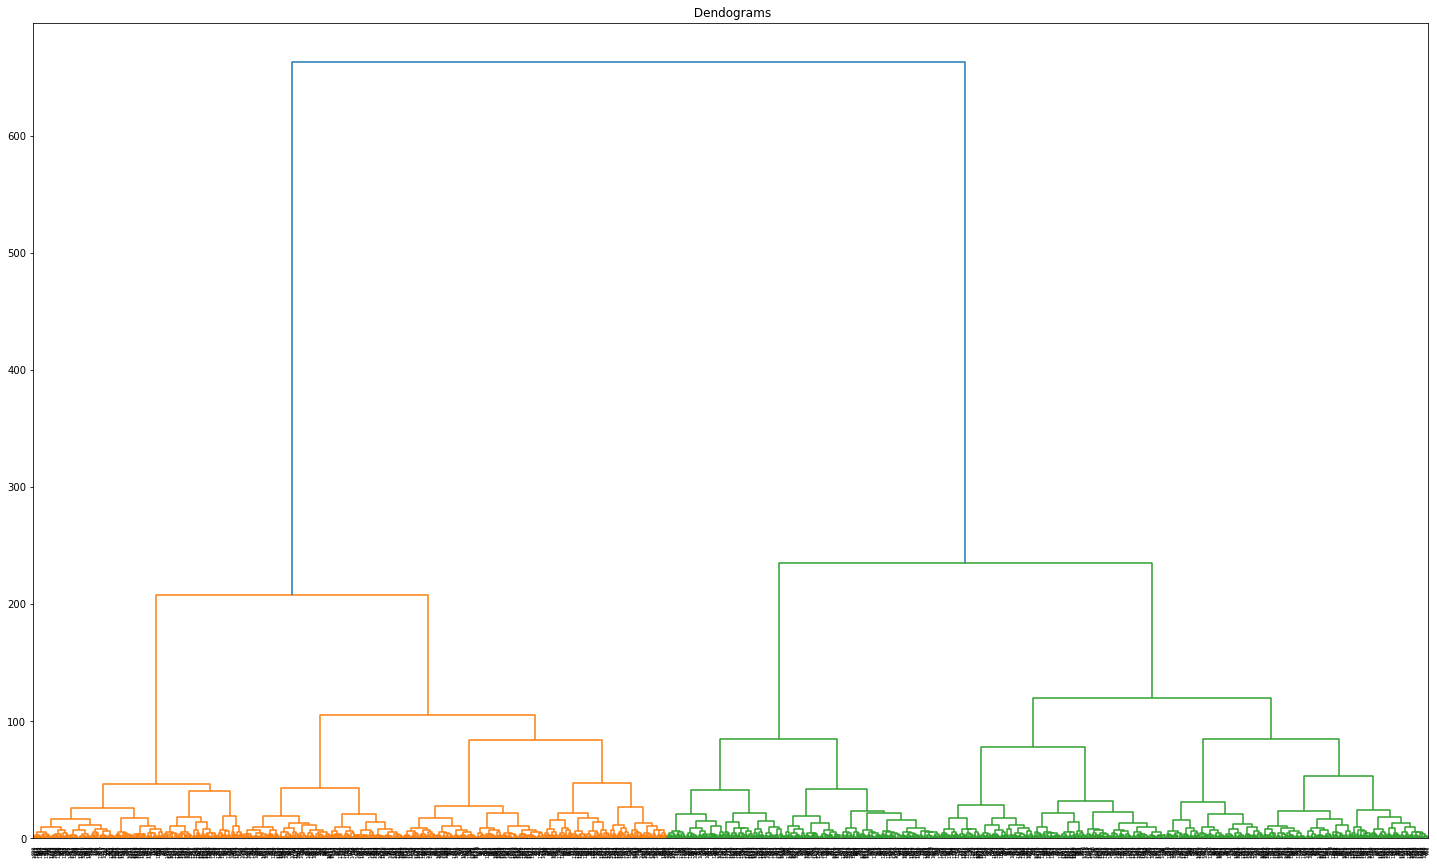

In [97]:
df_model = df.drop(['Gender'],axis=1)
plt.figure(figsize=(25, 15))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(df_model, method='ward'))

In [98]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 4,affinity= "euclidean",linkage = "ward")
hiyerartical_cluster.fit_predict(df_model)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


array([0, 2, 0, ..., 2, 1, 1], dtype=int64)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


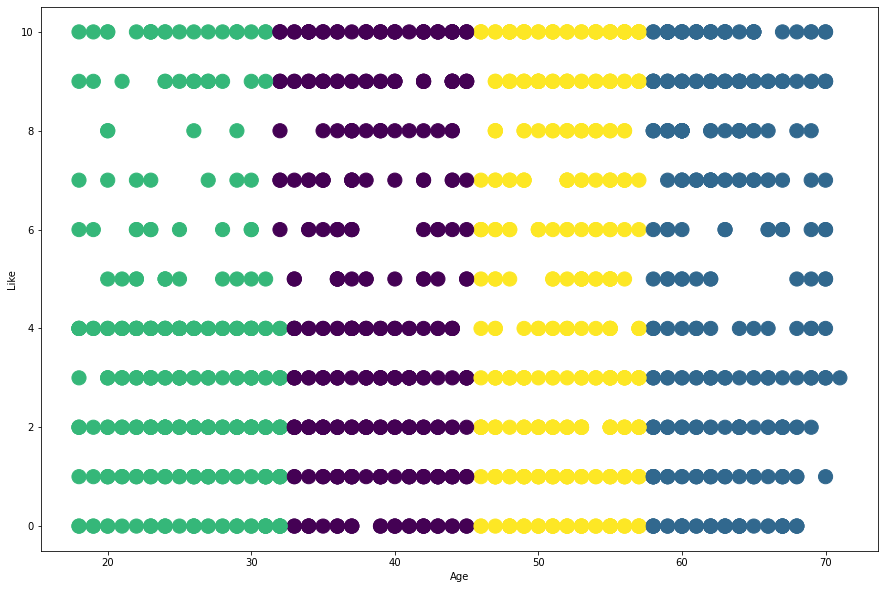

In [99]:
#create model
kmeans = KMeans(n_clusters=4)
df_predict = kmeans.fit_predict(df_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'Like' , data = df_model , c = df_predict , s = 200 )
plt.xlabel("Age")
plt.ylabel("Like")
plt.show()

In [100]:
df_predict

array([1, 3, 1, ..., 3, 0, 2])